In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point
import contextily as cx

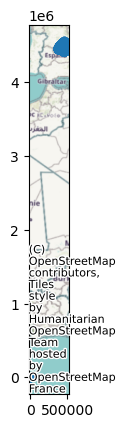

In [ ]:
df_establecimientosSanitarios = pd.read_csv('establecimientosSanitarios.csv', delimiter=';', encoding='ISO-8859-1')

gdf_estabSanitarios = df_establecimientosSanitarios.copy()
gdf_estabSanitarios['geometry'] = gdf_estabSanitarios[['localizacion_coordenada_x', 'localizacion_coordenada_y']].apply(lambda x : Point(x['localizacion_coordenada_x'], x['localizacion_coordenada_y']), axis=1)
gdf_estabSanitarios = gdf_estabSanitarios.set_geometry('geometry')
gdf_estabSanitarios = gdf_estabSanitarios.set_crs('EPSG:32630')
gdf_estabSanitarios.drop_duplicates(subset=['dependecia_patrimonial', 'geometry']).shape
gdf_estabSanitarios.to_file('./cleaned/establecimientosSanitarios.geojson') 

ax = gdf_estabSanitarios.plot()
cx.add_basemap(crs = gdf_estabSanitarios.crs, ax = ax)

note: there are 28 entries in the data in `establecimientosSanitarios.csv` that have their coordinates set to (-109, -128). These have the street they are on but no number, and no information with which they could be easily identified and the information. Additionally, they are all on one of five streets, which leads me to believe that they are all in the same health center. I will be deleting these in QGIS

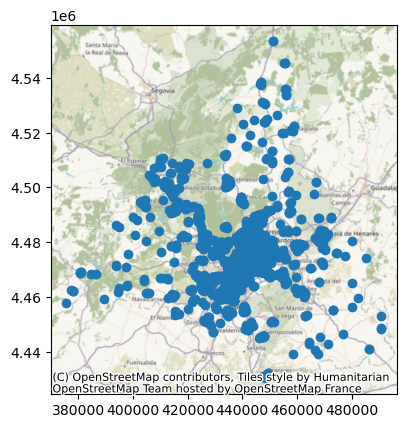

In [3]:
df_registroCentros = pd.read_csv('registroCentros.csv', delimiter = ';', encoding ='ISO-8859-1')
df_registroCentros = df_registroCentros[df_registroCentros['direccion_coor_x'] != 'RESERVADO']

gdf_registroCentros = df_registroCentros.copy()

gdf_registroCentros['geometry'] = gdf_registroCentros[['direccion_coor_x', 'direccion_coor_y']].apply(lambda x: Point(x['direccion_coor_x'], x['direccion_coor_y']), axis= 1)
gdf_registroCentros = gdf_registroCentros.set_geometry('geometry')
gdf_registroCentros = gdf_registroCentros.set_crs('EPSG:32630')
gdf_registroCentros = gdf_registroCentros.drop_duplicates(subset=['geometry', 'tipo_gestion'])
gdf_registroCentros.to_file('./cleaned/registroCentros.geojson') 

ax = gdf_registroCentros.plot()
cx.add_basemap(crs = gdf_registroCentros.crs, ax = ax)